In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import locale 
from google.cloud import bigquery
locale.setlocale(locale.LC_ALL, 'pt_BR.UTF-8')
pd.options.display.float_format = '{:.0f}'.format


In [2]:
df = pd.read_csv('C:\\Users\\daniel.pascoal\\Desktop\\MECAI\\Primeiro semestre 2020\\Probabilidade e Estatística\\Bases Home Credit\\application_train.csv')

## 1.Informações Pessoais

### 1.1 Idade

In [13]:
df['IDADE']=df['DAYS_BIRTH']*-1/365

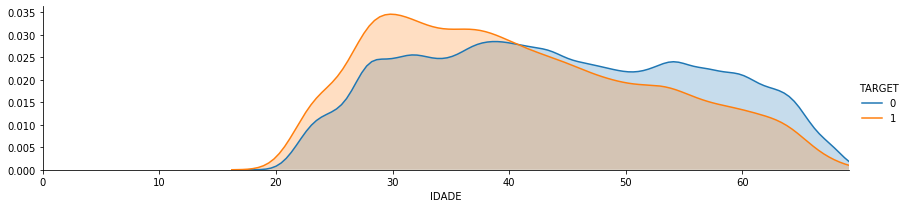

In [14]:
a = sns.FacetGrid( df, hue = 'TARGET', aspect=4 )
a.map(sns.kdeplot, 'IDADE', shade= True )
a.set(xlim=(0 , df['IDADE'].max()))
a.add_legend()

### 1.2 Renda

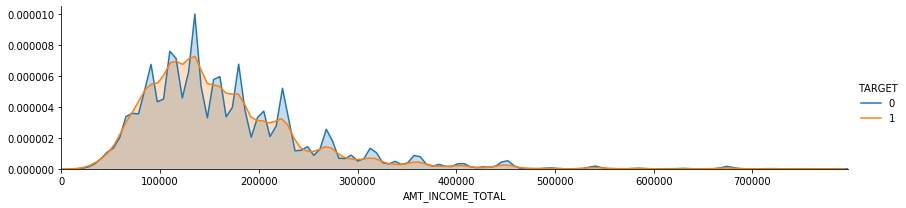

In [22]:
df1 = df[df['AMT_INCOME_TOTAL']<800000]

a = sns.FacetGrid( df1, hue = 'TARGET', aspect=4 )
a.map(sns.kdeplot, 'AMT_INCOME_TOTAL', shade= True )
a.set(xlim=(0 , df1['AMT_INCOME_TOTAL'].max()))
a.add_legend()

### 1.3 Escolaridade

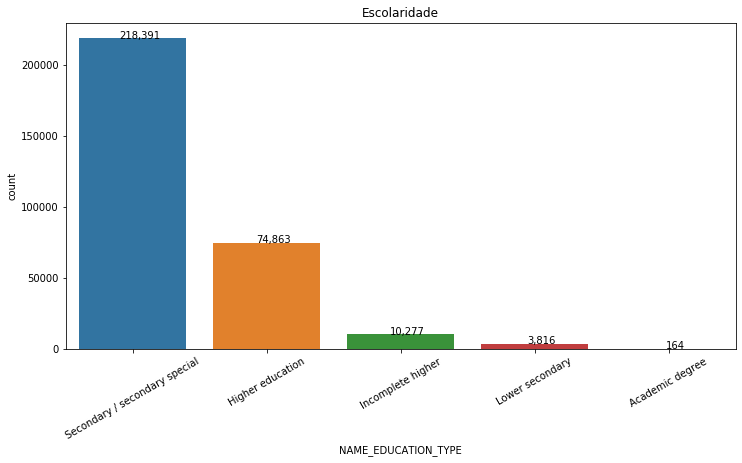

In [200]:
plt.figure(figsize=(12,6))
ax = sns.countplot(x="NAME_EDUCATION_TYPE", data=df)
ax.set_title('Escolaridade')
ax.set_xticklabels(ax.get_xticklabels(),rotation=30)

for p in ax.patches:
    ax.annotate('{:,.0f}'.format(p.get_height()), (p.get_x()+0.45, p.get_height()),ha="center")

No handles with labels found to put in legend.


[Text(0, 0, 'Lower secondary'),
 Text(0, 0, 'Secondary / secondary special'),
 Text(0, 0, 'Incomplete higher'),
 Text(0, 0, 'Higher education'),
 Text(0, 0, 'Academic degree')]

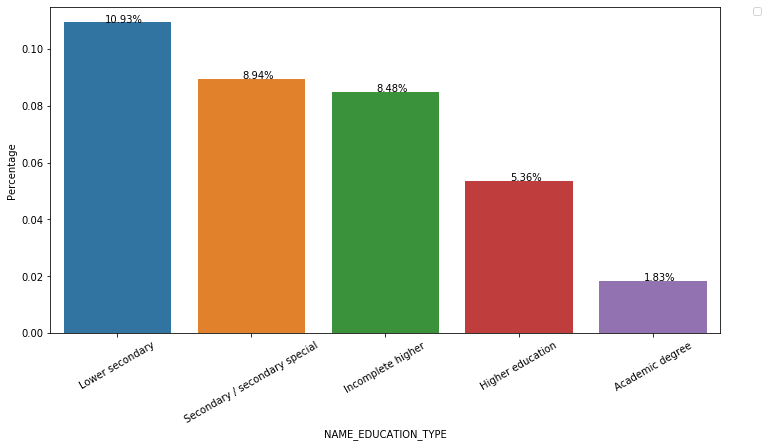

In [214]:
fig = plt.figure(figsize=(12,6))
var2 ='NAME_EDUCATION_TYPE'


SUM = df.groupby([var2])['TARGET'].sum().rename('soma_inadimplente').reset_index()
COUNT = df.groupby([var2])['SK_ID_CURR'].count().rename('count').reset_index()
Perc = pd.merge(SUM, COUNT,  how='left', left_on=[var2], right_on = [var2])
Perc['Percentage']= Perc['soma_inadimplente']/Perc['count']
Perc = Perc[Perc['Percentage']<0.2]
Perc.sort_values(by = 'Percentage',ascending = False,inplace= True)


ax = sns.barplot(x=var2, y="Percentage", data=Perc)
for p in ax.patches:
    ax.annotate('{:,.2%}'.format(p.get_height()), (p.get_x()+0.45, p.get_height()),ha="center")


plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
ax.set_xticklabels(ax.get_xticklabels(),rotation=30)   

#### 1.3.2 Escolaridade x Genero

Text(0.5, 1.0, 'Escolaridade x Genero - Inadimplentes')

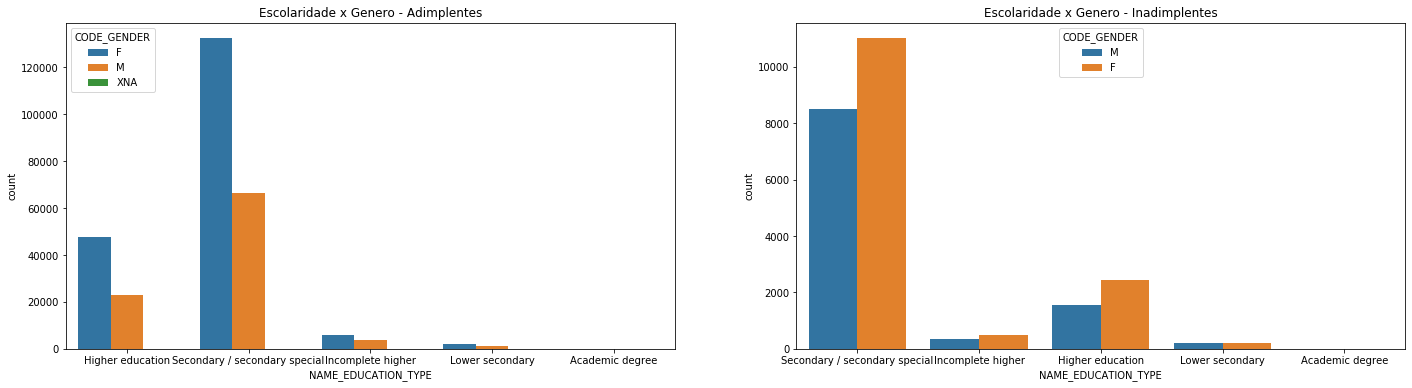

In [64]:
fig, qaxis = plt.subplots(1,2,figsize=(24,6))
sns.countplot(x="NAME_EDUCATION_TYPE", hue="CODE_GENDER", data=df[df['TARGET']==0],ax = qaxis[0])
qaxis[0].set_title('Escolaridade x Genero - Adimplentes')

sns.countplot(x="NAME_EDUCATION_TYPE", hue="CODE_GENDER", data=df[df['TARGET']==1],ax = qaxis[1])
qaxis[1].set_title('Escolaridade x Genero - Inadimplentes')

### 1.4 Fonte de Renda

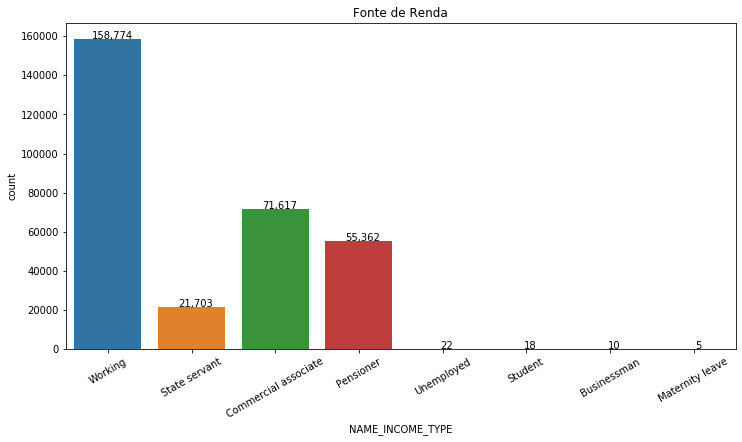

In [194]:



plt.figure(figsize=(12,6))
ax = sns.countplot(x="NAME_INCOME_TYPE", data=df)
ax.set_title('Fonte de Renda')
ax.set_xticklabels(ax.get_xticklabels(),rotation=30)

for p in ax.patches:
    ax.annotate('{:,.0f}'.format(p.get_height()), (p.get_x()+0.45, p.get_height()),ha="center")

No handles with labels found to put in legend.


[Text(0, 0, 'Working'),
 Text(0, 0, 'Commercial associate'),
 Text(0, 0, 'State servant'),
 Text(0, 0, 'Pensioner'),
 Text(0, 0, 'Businessman'),
 Text(0, 0, 'Student')]

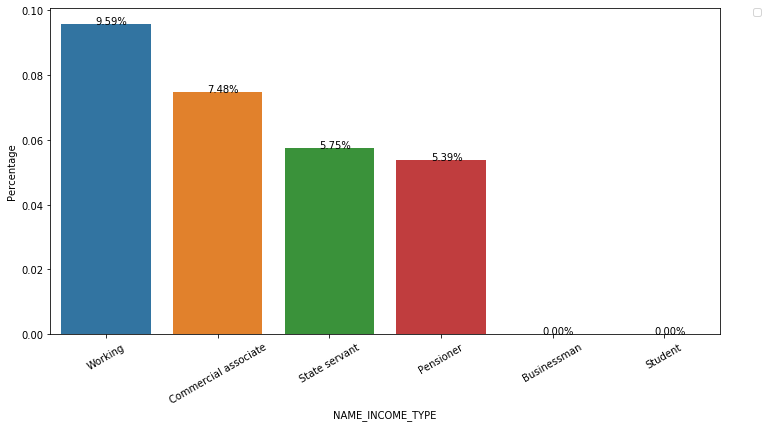

In [215]:
fig = plt.figure(figsize=(12,6))
var2 ='NAME_INCOME_TYPE'


SUM = df.groupby([var2])['TARGET'].sum().rename('soma_inadimplente').reset_index()
COUNT = df.groupby([var2])['SK_ID_CURR'].count().rename('count').reset_index()
Perc = pd.merge(SUM, COUNT,  how='left', left_on=[var2], right_on = [var2])
Perc['Percentage']= Perc['soma_inadimplente']/Perc['count']
Perc = Perc[Perc['Percentage']<0.2]
Perc.sort_values(by = 'Percentage',ascending = False,inplace= True)

ax = sns.barplot(x=var2, y="Percentage", data=Perc)
for p in ax.patches:
    ax.annotate('{:,.2%}'.format(p.get_height()), (p.get_x()+0.45, p.get_height()),ha="center")


plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
ax.set_xticklabels(ax.get_xticklabels(),rotation=30)   

#### 1.4.2 Fonte de Renda x Contract Type


[Text(0, 0, 'Working'),
 Text(0, 0, 'Commercial associate'),
 Text(0, 0, 'State servant'),
 Text(0, 0, 'Pensioner'),
 Text(0, 0, 'Student'),
 Text(0, 0, 'Businessman'),
 Text(0, 0, 'Maternity leave'),
 Text(0, 0, 'Unemployed')]

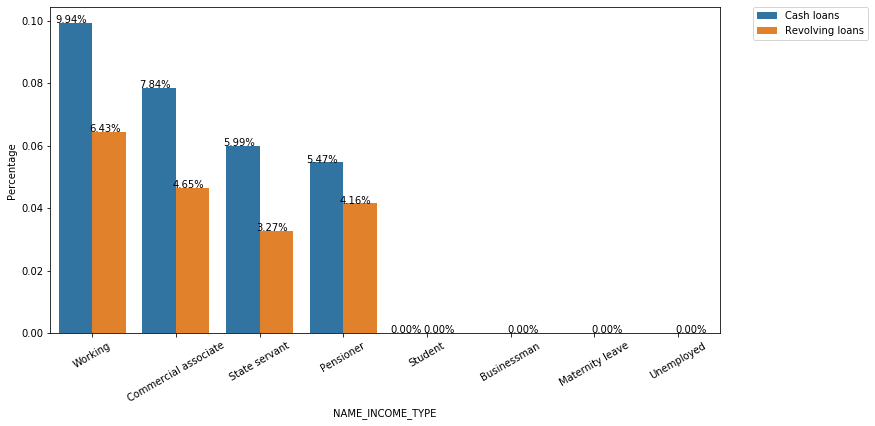

In [216]:
fig = plt.figure(figsize=(12,6))
var = 'NAME_CONTRACT_TYPE' 
var2 ='NAME_INCOME_TYPE'

SUM = df.groupby([var,var2])['TARGET'].sum().rename('soma_inadimplente').reset_index()
COUNT = df.groupby([var,var2])['SK_ID_CURR'].count().rename('count').reset_index()
Perc = pd.merge(SUM, COUNT,  how='left', left_on=[var,var2], right_on = [var,var2])
Perc['Percentage']= Perc['soma_inadimplente']/Perc['count']
Perc = Perc[Perc['Percentage']<0.2]
Perc.sort_values(by = 'Percentage',ascending = False,inplace= True)


ax = sns.barplot(x=var2, y="Percentage", hue=var, data=Perc)
for p in ax.patches:
    ax.annotate('{:,.2%}'.format(p.get_height()), (p.get_x()+0.15, p.get_height()),ha="center")


plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
ax.set_xticklabels(ax.get_xticklabels(),rotation=30)   

#### 1.4.2 Fonte de Renda x Genero

[Text(0, 0, 'State servant'),
 Text(0, 0, 'Working'),
 Text(0, 0, 'Commercial associate'),
 Text(0, 0, 'Pensioner'),
 Text(0, 0, 'Unemployed'),
 Text(0, 0, 'Student')]

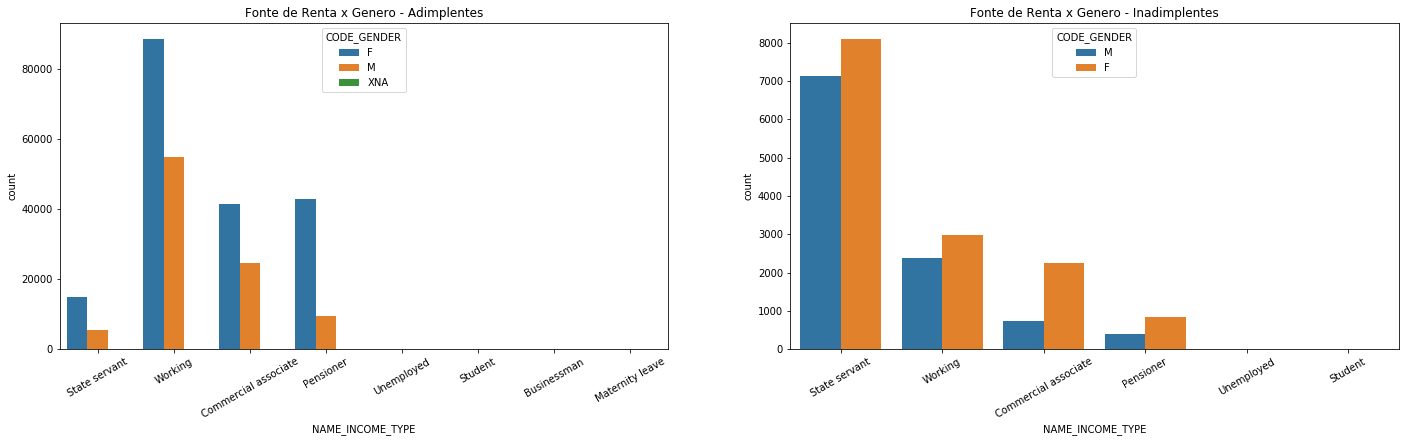

In [69]:
fig, qaxis = plt.subplots(1,2,figsize=(24,6))
sns.countplot(x="NAME_INCOME_TYPE", hue="CODE_GENDER", data=df[df['TARGET']==0],ax = qaxis[0])
qaxis[0].set_title('Fonte de Renta x Genero - Adimplentes')
qaxis[0].set_xticklabels(qaxis[0].get_xticklabels(),rotation=30)

sns.countplot(x="NAME_INCOME_TYPE", hue="CODE_GENDER", data=df[df['TARGET']==1],ax = qaxis[1])
qaxis[1].set_title('Fonte de Renta x Genero - Inadimplentes')
qaxis[1].set_xticklabels(qaxis[0].get_xticklabels(),rotation=30)


[Text(0, 0, 'Working'),
 Text(0, 0, 'Commercial associate'),
 Text(0, 0, 'Pensioner'),
 Text(0, 0, 'State servant'),
 Text(0, 0, 'Businessman'),
 Text(0, 0, 'Student'),
 Text(0, 0, 'Maternity leave')]

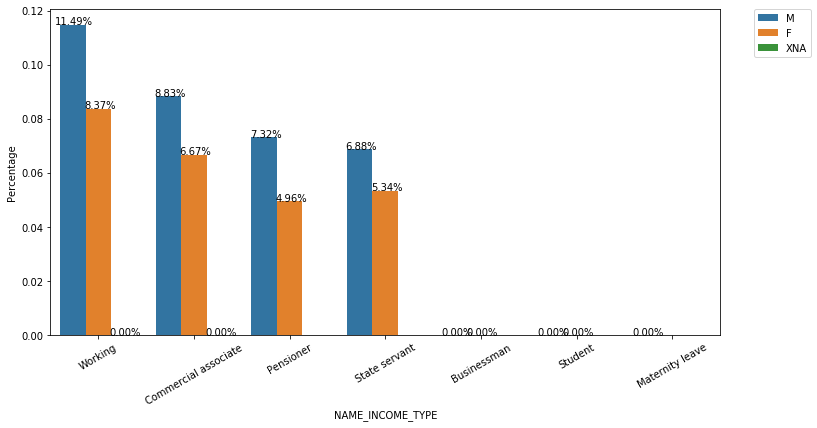

In [217]:
fig = plt.figure(figsize=(12,6))
var = 'CODE_GENDER' 
var2 ='NAME_INCOME_TYPE'


SUM = df.groupby([var,var2])['TARGET'].sum().rename('soma_inadimplente').reset_index()
COUNT = df.groupby([var,var2])['SK_ID_CURR'].count().rename('count').reset_index()
Perc = pd.merge(SUM, COUNT,  how='left', left_on=[var,var2], right_on = [var,var2])
Perc['Percentage']= Perc['soma_inadimplente']/Perc['count']
Perc = Perc[Perc['Percentage']<0.2]
Perc.sort_values(by = 'Percentage',ascending = False,inplace= True)

ax = sns.barplot(x=var2, y="Percentage", hue=var, data=Perc)
for p in ax.patches:
    ax.annotate('{:,.2%}'.format(p.get_height()), (p.get_x()+0.15, p.get_height()),ha="center")


plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
ax.set_xticklabels(ax.get_xticklabels(),rotation=30)   

### 1.5 Ocupação


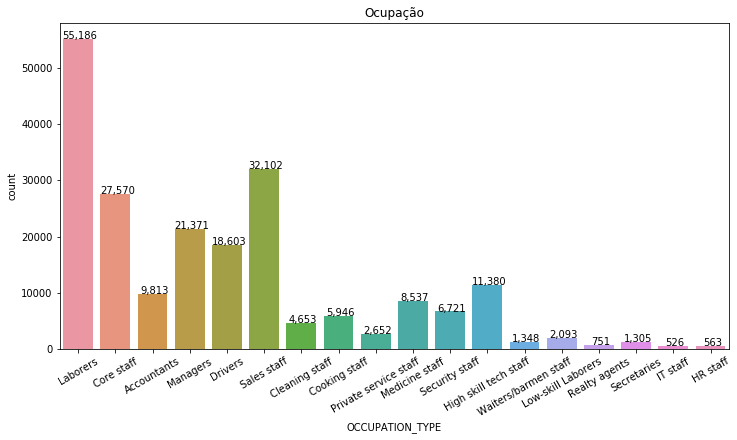

In [206]:
plt.figure(figsize=(12,6))
ax = sns.countplot(x="OCCUPATION_TYPE", data=df)
ax.set_title('Ocupação')
ax.set_xticklabels(ax.get_xticklabels(),rotation=30)

for p in ax.patches:
    ax.annotate('{:,.0f}'.format(p.get_height()), (p.get_x()+0.45, p.get_height()),ha="center")

No handles with labels found to put in legend.


[Text(0, 0, 'Low-skill Laborers'),
 Text(0, 0, 'Drivers'),
 Text(0, 0, 'Waiters/barmen staff'),
 Text(0, 0, 'Security staff'),
 Text(0, 0, 'Laborers'),
 Text(0, 0, 'Cooking staff'),
 Text(0, 0, 'Sales staff'),
 Text(0, 0, 'Cleaning staff'),
 Text(0, 0, 'Realty agents'),
 Text(0, 0, 'Secretaries'),
 Text(0, 0, 'Medicine staff'),
 Text(0, 0, 'Private service staff'),
 Text(0, 0, 'IT staff'),
 Text(0, 0, 'HR staff'),
 Text(0, 0, 'Core staff'),
 Text(0, 0, 'Managers'),
 Text(0, 0, 'High skill tech staff'),
 Text(0, 0, 'Accountants')]

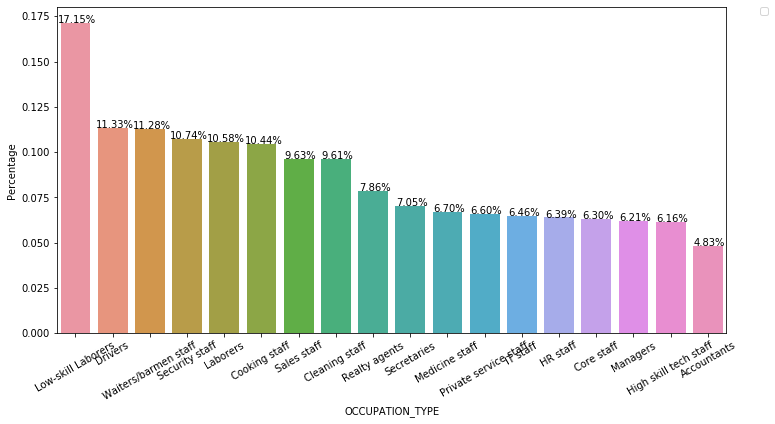

In [218]:
fig = plt.figure(figsize=(12,6))
var2 ='OCCUPATION_TYPE'


SUM = df.groupby([var2])['TARGET'].sum().rename('soma_inadimplente').reset_index()
COUNT = df.groupby([var2])['SK_ID_CURR'].count().rename('count').reset_index()
Perc = pd.merge(SUM, COUNT,  how='left', left_on=[var2], right_on = [var2])
Perc['Percentage']= Perc['soma_inadimplente']/Perc['count']
Perc = Perc[Perc['Percentage']<0.2]
Perc.sort_values(by = 'Percentage',ascending = False,inplace= True)

ax = sns.barplot(x=var2, y="Percentage", data=Perc)
for p in ax.patches:
    ax.annotate('{:,.2%}'.format(p.get_height()), (p.get_x()+0.45, p.get_height()),ha="center")


plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
ax.set_xticklabels(ax.get_xticklabels(),rotation=30)   

[Text(0, 0, 'Low-skill Laborers'),
 Text(0, 0, 'Waiters/barmen staff'),
 Text(0, 0, 'Drivers'),
 Text(0, 0, 'Security staff'),
 Text(0, 0, 'Laborers'),
 Text(0, 0, 'Cooking staff'),
 Text(0, 0, 'Sales staff'),
 Text(0, 0, 'Cleaning staff'),
 Text(0, 0, 'Realty agents'),
 Text(0, 0, 'IT staff'),
 Text(0, 0, 'Secretaries'),
 Text(0, 0, 'HR staff'),
 Text(0, 0, 'Medicine staff'),
 Text(0, 0, 'Private service staff'),
 Text(0, 0, 'Managers'),
 Text(0, 0, 'Core staff'),
 Text(0, 0, 'High skill tech staff'),
 Text(0, 0, 'Accountants')]

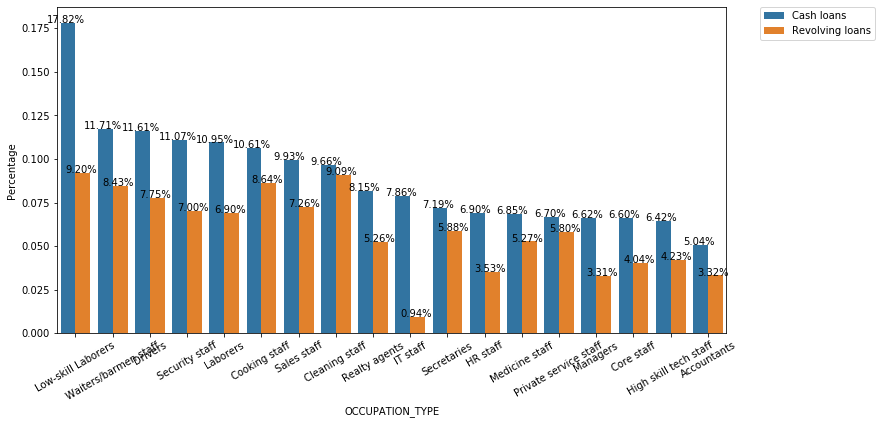

In [219]:
fig = plt.figure(figsize=(12,6))
var = 'NAME_CONTRACT_TYPE' 
var2 ='OCCUPATION_TYPE'

SUM = df.groupby([var,var2])['TARGET'].sum().rename('soma_inadimplente').reset_index()
COUNT = df.groupby([var,var2])['SK_ID_CURR'].count().rename('count').reset_index()
Perc = pd.merge(SUM, COUNT,  how='left', left_on=[var,var2], right_on = [var,var2])
Perc['Percentage']= Perc['soma_inadimplente']/Perc['count']
Perc.sort_values(by = 'Percentage',ascending = False,inplace= True)

ax = sns.barplot(x=var2, y="Percentage", hue=var, data=Perc)
for p in ax.patches:
    ax.annotate('{:,.2%}'.format(p.get_height()), (p.get_x()+0.15, p.get_height()),ha="center")


plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
ax.set_xticklabels(ax.get_xticklabels(),rotation=30)   

#### 1.5.2 Ocupação x Genero


[Text(0, 0, 'Laborers'),
 Text(0, 0, 'Cooking staff'),
 Text(0, 0, 'Sales staff'),
 Text(0, 0, 'Managers'),
 Text(0, 0, 'Private service staff'),
 Text(0, 0, 'Core staff'),
 Text(0, 0, 'High skill tech staff'),
 Text(0, 0, 'Medicine staff'),
 Text(0, 0, 'Drivers'),
 Text(0, 0, 'Security staff'),
 Text(0, 0, 'Low-skill Laborers'),
 Text(0, 0, 'Accountants'),
 Text(0, 0, 'Cleaning staff'),
 Text(0, 0, 'Realty agents'),
 Text(0, 0, 'Secretaries'),
 Text(0, 0, 'Waiters/barmen staff'),
 Text(0, 0, 'IT staff'),
 Text(0, 0, 'HR staff')]

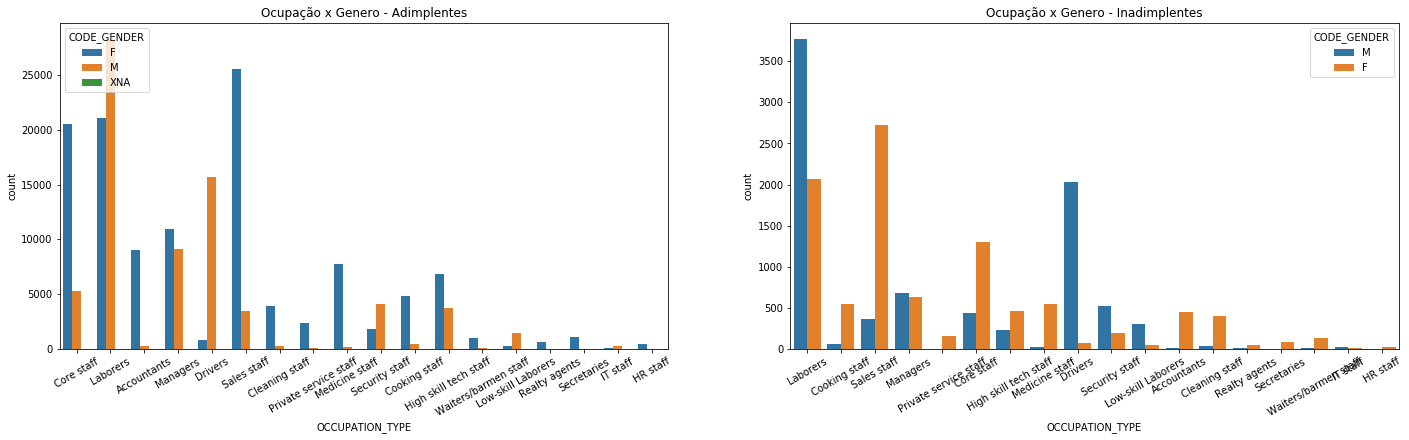

In [49]:

fig, qaxis = plt.subplots(1,2,figsize=(24,6))
sns.countplot(x="OCCUPATION_TYPE", hue="CODE_GENDER", data=df[df['TARGET']==0],ax = qaxis[0])
qaxis[0].set_title('Ocupação x Genero - Adimplentes')
qaxis[0].set_xticklabels(qaxis[0].get_xticklabels(),rotation=30)


sns.countplot(x="OCCUPATION_TYPE", hue="CODE_GENDER", data=df[df['TARGET']==1],ax = qaxis[1])
qaxis[1].set_title('Ocupação x Genero - Inadimplentes')
qaxis[1].set_xticklabels(qaxis[1].get_xticklabels(),rotation=30)



[Text(0, 0, 'Realty agents'),
 Text(0, 0, 'Low-skill Laborers'),
 Text(0, 0, 'Secretaries'),
 Text(0, 0, 'Laborers'),
 Text(0, 0, 'Cooking staff'),
 Text(0, 0, 'Waiters/barmen staff'),
 Text(0, 0, 'Drivers'),
 Text(0, 0, 'Security staff'),
 Text(0, 0, 'Cleaning staff'),
 Text(0, 0, 'Medicine staff'),
 Text(0, 0, 'Sales staff'),
 Text(0, 0, 'HR staff'),
 Text(0, 0, 'Core staff'),
 Text(0, 0, 'Managers'),
 Text(0, 0, 'Private service staff'),
 Text(0, 0, 'IT staff'),
 Text(0, 0, 'High skill tech staff'),
 Text(0, 0, 'Accountants')]

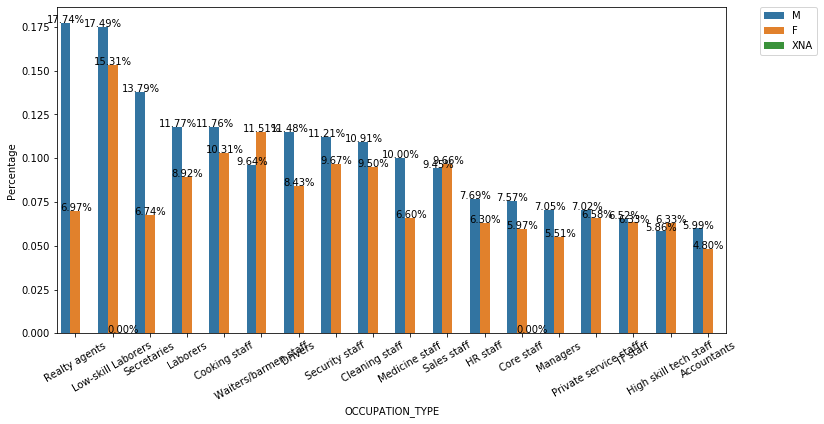

In [220]:
fig = plt.figure(figsize=(12,6))
var = 'CODE_GENDER' 
var2 ='OCCUPATION_TYPE'

SUM = df.groupby([var,var2])['TARGET'].sum().rename('soma_inadimplente').reset_index()
COUNT = df.groupby([var,var2])['SK_ID_CURR'].count().rename('count').reset_index()
Perc = pd.merge(SUM, COUNT,  how='left', left_on=[var,var2], right_on = [var,var2])
Perc['Percentage']= Perc['soma_inadimplente']/Perc['count']
Perc.sort_values(by = 'Percentage',ascending = False,inplace= True)


ax = sns.barplot(x=var2, y="Percentage", hue=var, data=Perc)
for p in ax.patches:
    ax.annotate('{:,.2%}'.format(p.get_height()), (p.get_x()+0.15, p.get_height()),ha="center")


plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
ax.set_xticklabels(ax.get_xticklabels(),rotation=30)   

### 1.6 Estado Civil

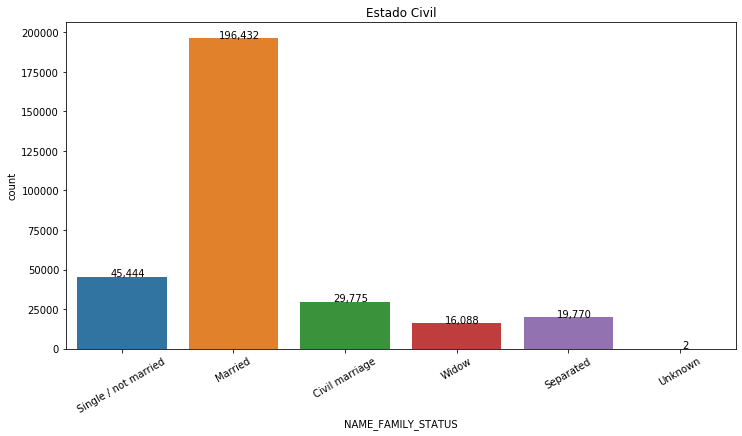

In [210]:
plt.figure(figsize=(12,6))
ax = sns.countplot(x="NAME_FAMILY_STATUS", data=df)
ax.set_title('Estado Civil')
ax.set_xticklabels(ax.get_xticklabels(),rotation=30)

for p in ax.patches:
    ax.annotate('{:,.0f}'.format(p.get_height()), (p.get_x()+0.45, p.get_height()),ha="center")

[Text(0, 0, 'Single / not married'),
 Text(0, 0, 'Widow'),
 Text(0, 0, 'Married'),
 Text(0, 0, 'Civil marriage'),
 Text(0, 0, 'Separated')]

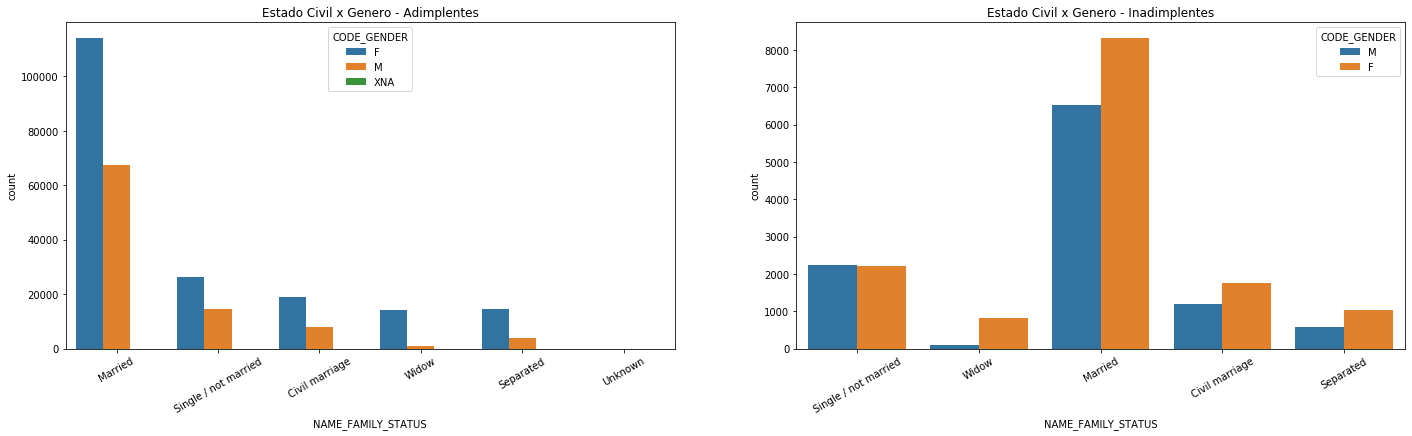

In [68]:
fig, qaxis = plt.subplots(1,2,figsize=(24,6))
sns.countplot(x="NAME_FAMILY_STATUS", hue="CODE_GENDER", data=df[df['TARGET']==0],ax = qaxis[0])
qaxis[0].set_title('Estado Civil x Genero - Adimplentes')
qaxis[0].set_xticklabels(qaxis[0].get_xticklabels(),rotation=30)


sns.countplot(x="NAME_FAMILY_STATUS", hue="CODE_GENDER", data=df[df['TARGET']==1],ax = qaxis[1])
qaxis[1].set_title('Estado Civil x Genero - Inadimplentes')
qaxis[1].set_xticklabels(qaxis[1].get_xticklabels(),rotation=30)

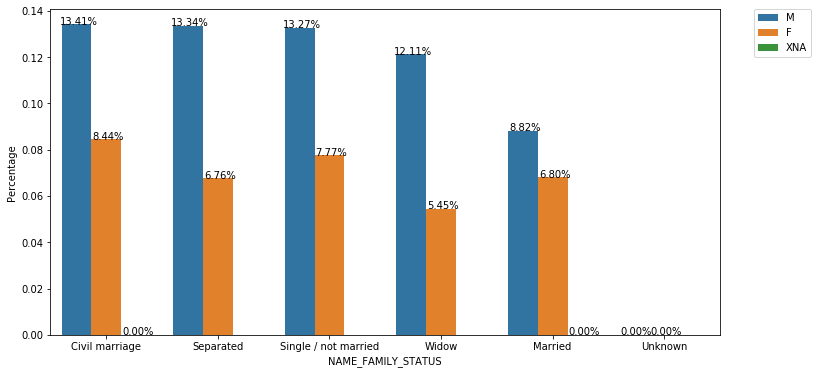

In [221]:
fig = plt.figure(figsize=(12,6))
SUM = df.groupby(['CODE_GENDER','NAME_FAMILY_STATUS'])['TARGET'].sum().rename('soma_inadimplente').reset_index()
COUNT = df.groupby(['CODE_GENDER','NAME_FAMILY_STATUS'])['SK_ID_CURR'].count().rename('count').reset_index()
Perc = pd.merge(SUM, COUNT,  how='left', left_on=['CODE_GENDER','NAME_FAMILY_STATUS'], right_on = ['CODE_GENDER','NAME_FAMILY_STATUS'])
Perc['Percentage']= Perc['soma_inadimplente']/Perc['count']
Perc.sort_values(by = 'Percentage',ascending = False,inplace= True)


ax = sns.barplot(x="NAME_FAMILY_STATUS", y="Percentage", hue="CODE_GENDER", data=Perc)
for p in ax.patches:
    ax.annotate('{:,.2%}'.format(p.get_height()), (p.get_x()+0.15, p.get_height()),ha="center")
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)


In [15]:
df['AMT_INCOME_TOTAL'].describe()

count      307511
mean       168798
std        237123
min         25650
25%        112500
50%        147150
75%        202500
max     117000000
Name: AMT_INCOME_TOTAL, dtype: float64

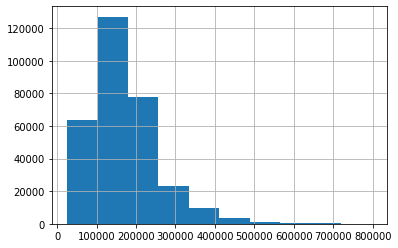

In [18]:
df['AMT_INCOME_TOTAL'][df['AMT_INCOME_TOTAL']<800000].hist()

In [21]:
print( "mediana",df['AMT_INCOME_TOTAL'].median())
print( "media",df['AMT_INCOME_TOTAL'].mean())

mediana 147150.0
media 168797.9192969845


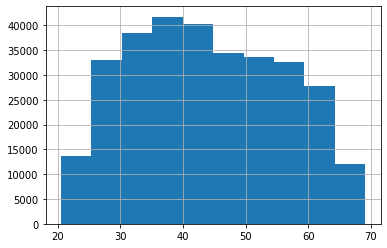

In [26]:
df['DAYS_BIRTH'].hist()

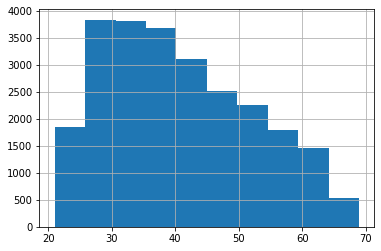

In [27]:
df['DAYS_BIRTH'][df['TARGET']==1].hist()

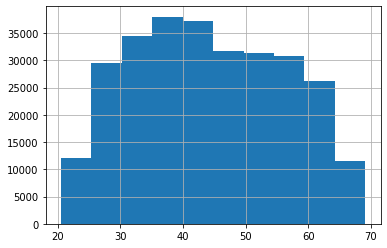

In [28]:
df['DAYS_BIRTH'][df['TARGET']==0].hist()

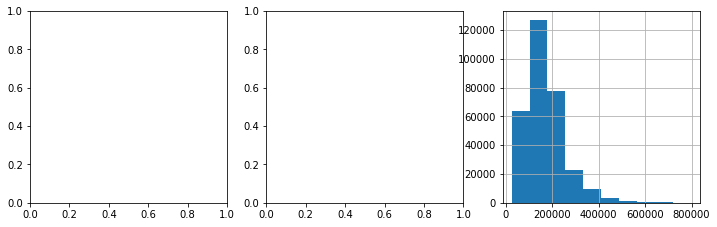

In [9]:

fig = plt.figure(figsize = (12,12))
ax1 = fig.add_subplot(3,3,1)
ax2 = fig.add_subplot(3,3,2)
ax3 = fig.add_subplot(3,3,3)

ax1 = df['AMT_INCOME_TOTAL'][df['AMT_INCOME_TOTAL']<800000].hist()

